<a href="https://colab.research.google.com/github/noushadkhan01/Projects/blob/master/Deep-Learning/CNN/mnist_digit_recognizer_by_udacity_deep_learning_nanodegree_program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/udacity/aind2-cnn.git

fatal: destination path 'aind2-cnn' already exists and is not an empty directory.


In [2]:
!ls

aind2-cnn  sample_data


In [3]:
%cd aind2-cnn

/content/aind2-cnn


# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

In [4]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

Using TensorFlow backend.


The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

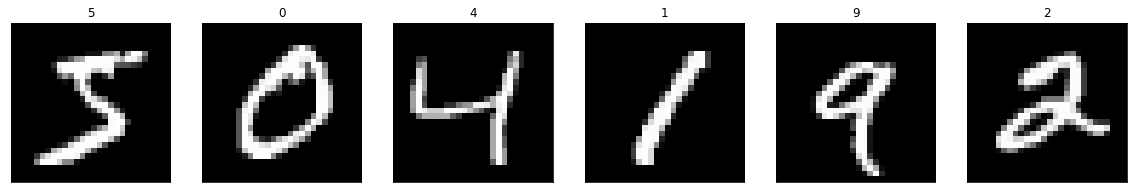

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

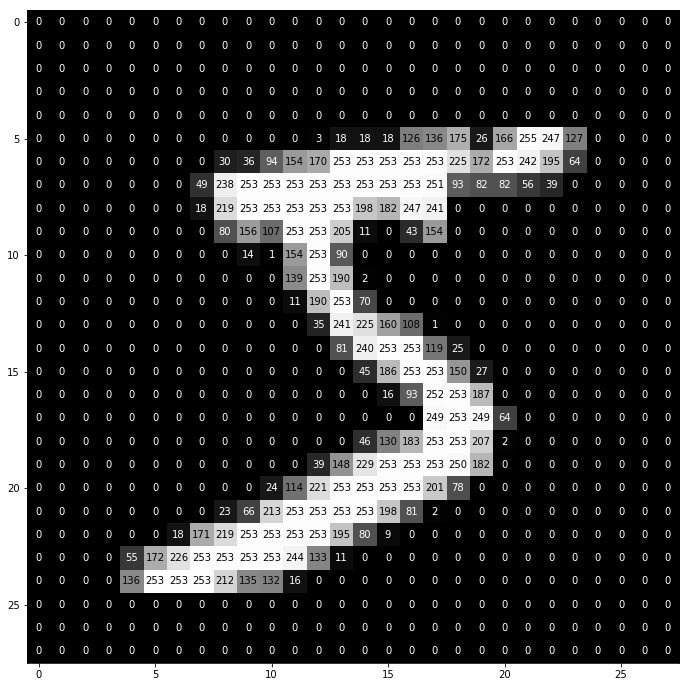

In [6]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [0]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

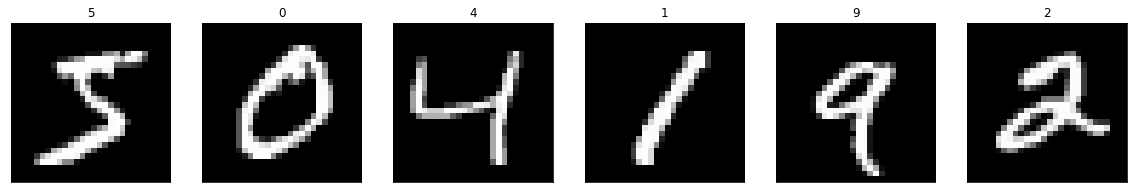

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [9]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])
from sklearn.preprocessing import OneHotEncoder

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]


In [10]:
y_train.shape

(60000,)

In [0]:
import numpy as np

In [12]:
ohe = OneHotEncoder(sparse = False, categories = 'auto')
y_train = ohe.fit_transform(y_train[:, np.newaxis])
y_train[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [13]:
y_test = ohe.transform(y_test[:, np.newaxis])
y_test[:2]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

###2nd method for onehotencoder with np.utils

In [0]:
from keras.utils import np_utils
# one-hot encode the labels
#y_train = np_utils.to_categorical(y_train, 10)
#y_test = np_utils.to_categorical(y_test, 10)

### 6. Define the Model Architecture

In [15]:
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [16]:
import tensorflow as tf
tf.__version__

'1.14.0'

In [0]:
def create_model():
# define the model
  model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=X_train.shape[1:]),
  tf.keras.layers.Dense(512, activation= tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation= tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation= tf.nn.softmax)
  ])
  model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [20]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [21]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 8.7100%


### 9. Train the Model

In [24]:
#train model
model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_data = (X_test, y_test),
          verbose=1, shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1028 - acc: 0.9696 - val_loss: 0.0792 - val_acc: 0.9771
Epoch 2/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0739 - acc: 0.9782 - val_loss: 0.0760 - val_acc: 0.9779
Epoch 3/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0604 - acc: 0.9822 - val_loss: 0.0717 - val_acc: 0.9796
Epoch 4/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0504 - acc: 0.9850 - val_loss: 0.0812 - val_acc: 0.9796
Epoch 5/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0458 - acc: 0.9860 - val_loss: 0.0749 - val_acc: 0.9827
Epoch 6/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0397 - acc: 0.9877 - val_loss: 0.0839 - val_acc: 0.9811
Epoch 7/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0362 - acc: 0.9894 - val_loss: 0.

In [0]:
model.save('saved_model.h5')

In [27]:
model2 = tf.keras.models.load_model('saved_model.h5')

W0820 13:48:22.858572 140429671012224 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0820 13:48:22.860233 140429671012224 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### 11. Calculate the Classification Accuracy on the Test Set

In [28]:
test_score1 = model2.evaluate(X_test, y_test)
test_score1

10000/10000 [==============================] - 1s 62us/sample - loss: 0.0986 - acc: 0.9827


[0.09856279919306707, 0.9827]

In [29]:
test_accuracy1 = test_score1[1]*100
test_accuracy1

98.2699990272522

In [30]:
train_score1 = model.evaluate(X_train, y_train)
train_score1

60000/60000 [==============================] - 3s 54us/sample - loss: 0.0100 - acc: 0.9968


[0.010003087292319825, 0.9967833]

In [40]:
train_accuracy1 = train_score1[1]*100
train_accuracy1

99.67833161354065

# Adam Optimizer

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import keras
# define the model
model2 = Sequential([
                  keras.layers.Flatten(input_shape=X_train.shape[1:]),
                  keras.layers.Dense(512, activation='relu'),
                  keras.layers.Dropout(0.2),
                  keras.layers.Dense(512, activation='relu'),
                  keras.layers.Dropout(0.2),
                  keras.layers.Dense(10, activation='softmax')
                  ])
# summarize the model
model2.summary()

W0820 13:49:41.612818 140429671012224 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [33]:
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

W0820 13:49:57.082216 140429671012224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
!ls

cifar10-augmentation	LICENSE.txt	       requirements
cifar10-classification	mnist-mlp	       transfer-learning
CODEOWNERS		mnist.model.best.hdf5
conv-visualization	README.md


In [34]:
model2.fit(X_train, y_train, batch_size=128, epochs=10,
          verbose=1, shuffle=True)

W0820 13:50:47.116948 140429671012224 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.2462 - acc: 0.9264
Epoch 2/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.1006 - acc: 0.9695
Epoch 3/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0718 - acc: 0.9774
Epoch 4/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0558 - acc: 0.9822
Epoch 5/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0454 - acc: 0.9850
Epoch 6/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0394 - acc: 0.9874
Epoch 7/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0367 - acc: 0.9877
Epoch 8/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0317 - acc: 0.9897
Epoch 9/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0277 - acc: 0.9905
Epoch 10/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0248 - acc: 0.9910

In [35]:
test_score2 = model2.evaluate(X_test, y_test)
test_score2

10000/10000 [==============================] - 1s 50us/step


[0.061980861790540805, 0.983]

In [36]:
test_accuracy2 = test_score2[1]*100
test_accuracy2

98.3

In [37]:
train_score2 = model2.evaluate(X_train, y_train)
train_score2

60000/60000 [==============================] - 3s 44us/step


[0.007150208506677154, 0.9977666666666667]

In [38]:
train_accuracy2 = train_score2[1]*100
train_accuracy2

99.77666666666667

# RMSProp vs. Adam

In [41]:
print(f'Adam\'s Optimizer Accuracy (Training Set):--- {train_accuracy2}\n')
print(f'Adam\'s Optimzer Accuracy (Test Set):--- {test_accuracy2}\n\n')

print(f'RMSProp\'s Optimizer Accuracy (Training Set):--- {train_accuracy1}\n')
print(f'RMSProp\'s Optimizer Accuracy (Test Set):--- {test_accuracy1}')

Adam's Optimizer Accuracy (Training Set):--- 99.77666666666667

Adam's Optimzer Accuracy (Test Set):--- 98.3


RMSProp's Optimizer Accuracy (Training Set):--- 99.67833161354065

RMSProp's Optimizer Accuracy (Test Set):--- 98.2699990272522
